<a href="https://colab.research.google.com/github/ingridfigenskau/airbnb_project/blob/main/Project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EBGN 525 A Business Analytics
# TERM PROJECT




## 1. Starting Steps

### 1.1 Loading Libraries

To be able to run code and proceed with operations, we need to load several libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


### 1.2 Loading The Dataset

We uploaded our dataset to github so that our dataset is available for use at any computer without the need for downloading.

In [ ]:
airbnb_data = pd.read_csv('https://raw.githubusercontent.com/ingridfigenskau/airbnb_project/main/AirBnb_NYC_dataset.csv')

### 1.3 Initial Visualizations

Firstly, we can check the dimentions of our dataset:

In [ ]:
airbnb_data.shape

(48895, 17)

Dataset has 17 variables (columns) and 48895 data points (rows)

### 1.4 First rows of the dataset

To understand our dataset, we can look the first rows of the dataset.

In [ ]:
airbnb_data.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1.0,9.0,2018-10-19,0.21,6,365
1,2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1.0,45.0,2019-05-21,0.38,2,355
2,3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3.0,0.0,NaN,NaN,1,365
3,4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,NaN,Entire home/apt,89,1.0,270.0,2019-07-05,4.64,1,194
4,5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10.0,9.0,2018-11-19,0.10,1,0


### 1.5 Summary statistics for the data

In [ ]:
airbnb_data.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,4.889500e+04,4.889500e+04,46687.000000,45360.000000,48895.000000,45305.000000,46352.000000,38843.000000,48895.000000,48895.000000
mean,24448.000000,1.901714e+07,6.762001e+07,40.728882,-73.952234,152.720687,7.064584,23.285791,1.373221,7.143982,112.781327
std,14114.915043,1.098311e+07,7.861097e+07,0.054538,0.046145,240.154170,20.943913,44.589029,1.680442,32.952519,131.622289
min,1.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12224.500000,9.471945e+06,7.822033e+06,40.689980,-73.983130,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24448.000000,1.967728e+07,3.079382e+07,40.722990,-73.955720,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,36671.500000,2.915218e+07,1.074344e+08,40.763100,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,48895.000000,3.648724e+07,2.743213e+08,40.913060,-73.716900,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 1.6 Info about Dataframe

Column names, non-null counts and data types of each column

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      48895 non-null  int64  
 1   id                              48895 non-null  int64  
 2   name                            48223 non-null  object 
 3   host_id                         48895 non-null  int64  
 4   host_name                       47936 non-null  object 
 5   neighbourhood_group             47462 non-null  object 
 6   neighbourhood                   46087 non-null  object 
 7   latitude                        46687 non-null  float64
 8   longitude                       45360 non-null  float64
 9   room_type                       46608 non-null  object 
 10  price                           48895 non-null  int64  
 11  minimum_nights                  45305 non-null  float64
 12  number_of_reviews               

#### EXPLANATION OF THE COLUMNS

**Unnamed: 0**  : Record Index Number

**id**: Rental property Identification Number

**name**: Name of the Rental property shown on the airbnb website

**host_id** : Identification number of the Rental property host

**host_name** : Name of the hosts

**neighborhood_group**: Shows in which borough the Rental property is in

**neighborhood** : Shows in which neighborhood the Rental property is in

**latitude** : Latitude of the Rental property

**longitude** : Longitude of the Rental property

**room_type** : Type of the Rental property

**price** : Nightly price of the Rental property

**minimum nights** : Minimum night of state for the selected Rental property

**number_of_reviews** : Number of Reviews

**last_review** : Last date of the review to the property

**calculated_host_listings_count** : Number of property that the host has on airbnb




### 1.7 Check if dataset has duplicate rows

In [ ]:
if airbnb_data.drop_duplicates(subset=None).shape == airbnb_data.shape:
   print("No duplicates")

No duplicates


## 2. Missing Cells

### 2.1 Display percentage of Missing Cells for each Column

In [ ]:
round((airbnb_data.isnull().sum()/len(airbnb_data.index)) *100,2) #percent of missing values

Unnamed: 0                         0.00
id                                 0.00
name                               1.37
host_id                            0.00
host_name                          1.96
neighbourhood_group                2.93
neighbourhood                      5.74
latitude                           4.52
longitude                          7.23
room_type                          4.68
price                              0.00
minimum_nights                     7.34
number_of_reviews                  5.20
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

### 2.2 Display count of Missing Cells for each Column

In [ ]:
airbnb_data.isnull().sum(axis=0)

Unnamed: 0                            0
id                                    0
name                                672
host_id                               0
host_name                           959
neighbourhood_group                1433
neighbourhood                      2808
latitude                           2208
longitude                          3535
room_type                          2287
price                                 0
minimum_nights                     3590
number_of_reviews                  2543
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 2.3 "reviews_per_month" Column

if reviews per month is NaN, we can assume that there is no review for the particular entry. So, we set "reviews_per_month" column to 0 if it is NaN.

In [ ]:
airbnb_data['reviews_per_month'] = airbnb_data['reviews_per_month'].replace(np.nan, 0)

### 2.4 "last_review" Column

this column is unrelated with our project questions. We drop the column.

In [ ]:
airbnb_data.drop(['last_review'], axis=1, inplace=True)

### 2.5 "minimum_nights" Column

if minimum nights is NaN, we can assume that there is no minimum night condition. So, we set "minimum_nights" column to 1 which is the minimum possible value if it is NaN.

In [ ]:
airbnb_data['minimum_nights'] = airbnb_data['minimum_nights'].replace(np.nan, 1)

### 2.6 "number_of_reviews" Column

if number of reviews is NaN, we can assume that there is no review for particular entry. So, we set "number_of_reviews" column to 0 if it is NaN.

In [ ]:
airbnb_data['number_of_reviews'] = airbnb_data['number_of_reviews'].replace(np.nan, 0)

### 2.7 "room_type" Column

if room type is NaN, first we have to check the distrution of room types.

In [ ]:
airbnb_data['room_type'].value_counts()

room_type
Entire home/apt    24268
Private room       21235
Shared room         1105
Name: count, dtype: int64

Entire home/apt is the dominant category, we can assume that if room type is NaN, we set it to "Entire home/apt"

In [ ]:
airbnb_data['room_type'] = airbnb_data['room_type'].replace(np.nan, 'Entire home/apt')

### 2.8 Irrelevant Columns: Unnamed: 0, id, host_id, host_name, name

The Columns Unnamed: 0, id, host_id, host_name, and name are  unrelated with our project questions. We drop the columns.

In [ ]:
airbnb_data.drop(['Unnamed: 0'], axis=1, inplace=True)
airbnb_data.drop(['id'], axis=1, inplace=True)
airbnb_data.drop(['host_id'], axis=1, inplace=True)
airbnb_data.drop(['host_name'], axis=1, inplace=True)
airbnb_data.drop(['name'], axis=1, inplace=True)

### 2.9 "Latitude" and "Longitude" Columns

Since we do not have any idea for the NaN latitude and longitude values. We drop the rows if latitude or longitude of the row is NaN

In [ ]:
airbnb_data = airbnb_data[airbnb_data['latitude'].notnull()]
airbnb_data = airbnb_data[airbnb_data['longitude'].notnull()]

### 2.10 "neighbourhood_group" and "neighbourhood" Columns

Neighbourhood Group is the group name of the set of neighbourhoods. So, we can interpret Neighbourhood Group with another row if it has the same neighbourhood category.

In [ ]:
sub_data = airbnb_data.iloc[:,0:2]
sub_data.drop_duplicates(subset=None,inplace=True)
sub_data = sub_data[sub_data['neighbourhood_group'].notnull()]
sub_data = sub_data[sub_data['neighbourhood'].notnull()]
for i in range(0,len(airbnb_data)):
    if airbnb_data.iloc[i,0] is np.NaN:
        if airbnb_data.iloc[i,1] is not np.NaN:
            neigh = airbnb_data.iloc[i,1]
            neigh_gr_ind = np.where(sub_data['neighbourhood'] == neigh)[0]
            airbnb_data.iloc[i,0] = sub_data.iloc[neigh_gr_ind,0]

After "neighbourhood" Columns is filled by looking at with similar entries, If "neighbourhood_group" or "neighbourhood" Columns are still NaN. we drop these rows.

In [ ]:
airbnb_data = airbnb_data[airbnb_data['neighbourhood_group'].notnull()]
airbnb_data = airbnb_data[airbnb_data['neighbourhood'].notnull()]

### 2.11 Final Check

Final check if data has null values

In [ ]:
airbnb_data.isnull().sum(axis=0)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 2.12 Delete outlier values from 'price' Column

Delete if price is 0

In [ ]:
airbnb_data = airbnb_data[airbnb_data['price'] != 0]

## 3. Dummy Columns

We have to create dummy columns for the categorical columns. Let us display data type of each columun.

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40853 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             40853 non-null  object 
 1   neighbourhood                   40853 non-null  object 
 2   latitude                        40853 non-null  float64
 3   longitude                       40853 non-null  float64
 4   room_type                       40853 non-null  object 
 5   price                           40853 non-null  int64  
 6   minimum_nights                  40853 non-null  float64
 7   number_of_reviews               40853 non-null  float64
 8   reviews_per_month               40853 non-null  float64
 9   calculated_host_listings_count  40853 non-null  int64  
 10  availability_365                40853 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 3.7+ MB


In [ ]:
neighbourhoods = airbnb_data['neighbourhood'].unique()
neighborhood_mapping = {}
for num in range(len(neighbourhoods)):
    neighborhood_mapping[neighbourhoods[num]] = num

In [ ]:
airbnb_data.loc[:,'neighbourhood':'neighbourhood'] = airbnb_data['neighbourhood'].map(neighborhood_mapping)

**"neighbourhood_group", "neighbourhood" and "room_type" are the categorical columns. We create dummy columns for these columns.**

In [ ]:
# Convert columns to strings if necessary
transform_these_columns = ['neighbourhood_group','room_type']

airbnb_data[transform_these_columns] = airbnb_data[transform_these_columns].astype(str)

<ipython-input-130-4903e9d22585>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_data[transform_these_columns] = airbnb_data[transform_these_columns].astype(str)


In [ ]:
dummy_columns = pd.get_dummies(airbnb_data[transform_these_columns], drop_first=False,dtype=int)

**add dummy columns to the data set and drop actual columns**

In [ ]:
airbnb_data = pd.concat([airbnb_data, dummy_columns], axis=1)
airbnb_data.drop(['neighbourhood'], axis=1, inplace=True)

In [ ]:
airbnb_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,Brooklyn,40.64749,-73.97237,Private room,149,1.0,9.0,0.21,6,365,0,1,0,0,0,0,1,0
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1.0,45.0,0.38,2,355,0,0,1,0,0,1,0,0
2,Manhattan,40.80902,-73.94190,Private room,150,3.0,0.0,0.00,1,365,0,0,1,0,0,0,1,0
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10.0,9.0,0.10,1,0,0,0,1,0,0,1,0,0
6,Brooklyn,40.68688,-73.95596,Private room,60,45.0,0.0,0.40,1,0,0,1,0,0,0,0,1,0


## 4. Questions
### 4.1 Descriptive Analytics Questions
### 4.1.1 Which of the 5 neighborhood groups will have the most expensive airbnb rentals?

In [ ]:
Bronx = airbnb_data[airbnb_data['neighbourhood_group_Bronx'] == 1]
Brooklyn = airbnb_data[airbnb_data['neighbourhood_group_Brooklyn'] == 1]
Manhattan = airbnb_data[airbnb_data['neighbourhood_group_Manhattan'] == 1]
St_Island = airbnb_data[airbnb_data['neighbourhood_group_Staten Island'] == 1]
Queens = airbnb_data[airbnb_data['neighbourhood_group_Queens'] == 1]

In [ ]:
Bronx['price'].describe()

count     919.000000
mean       88.860718
std       112.273826
min        20.000000
25%        45.500000
50%        67.000000
75%       100.000000
max      2500.000000
Name: price, dtype: float64

In [ ]:
Brooklyn['price'].describe()

count    16781.000000
mean       123.591562
std        174.642933
min         10.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
Manhattan['price'].describe()

count    18083.000000
mean       196.666095
std        278.668772
min         10.000000
25%         95.000000
50%        150.000000
75%        220.000000
max       9999.000000
Name: price, dtype: float64

In [ ]:
St_Island['price'].describe()

count     324.000000
mean      114.669753
std       289.932754
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64

In [ ]:
Queens['price'].describe()

count     4746.000000
mean        99.536452
std        177.744346
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64

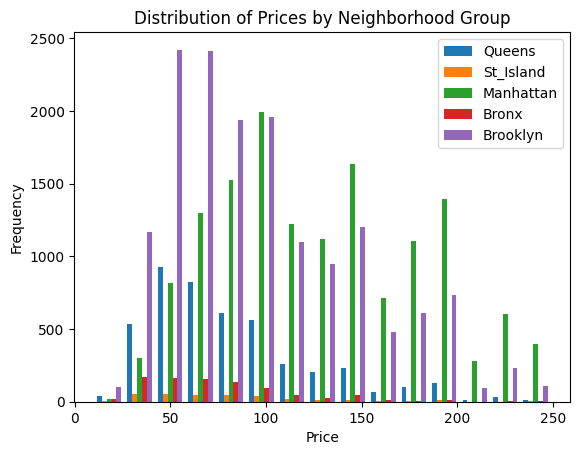

In [ ]:
x_multi = Queens[Queens['price']<250]['price'],St_Island[St_Island['price']<250]['price'],Manhattan[Manhattan['price']<250]['price'],Bronx[Bronx['price']<250]['price'],Brooklyn[Brooklyn['price']<250]['price']
plt.hist(x_multi, 15, histtype='bar')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices by Neighborhood Group')
plt.legend(('Queens','St_Island','Manhattan','Bronx','Brooklyn'), loc='upper right')

<Axes: >

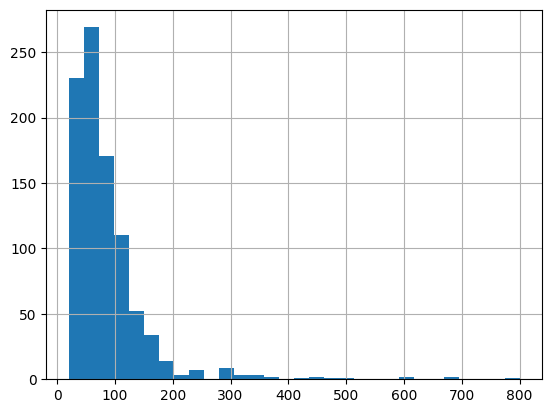

In [ ]:
Bronx[Bronx['price']<1000]['price'].hist(bins = 30)

<Axes: >

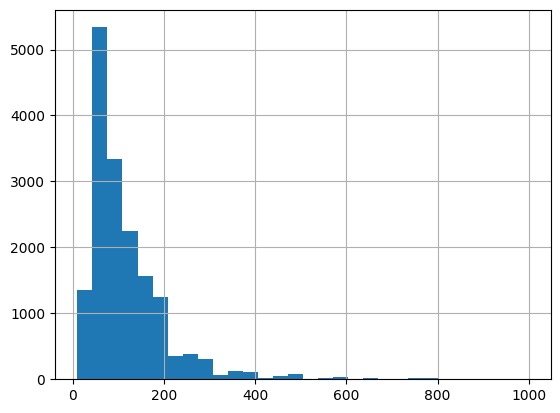

In [ ]:
Brooklyn[Brooklyn['price']<1000]['price'].hist(bins = 30)

<Axes: >

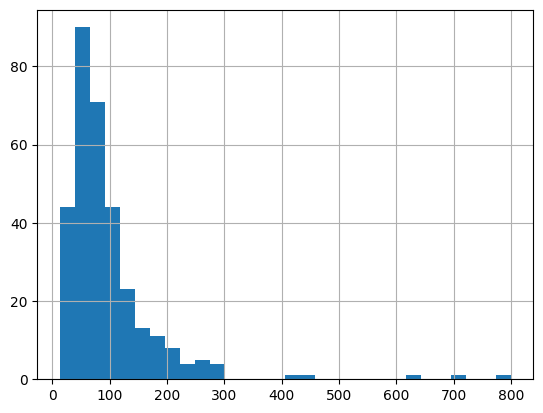

In [ ]:
St_Island[St_Island['price']<1000]['price'].hist(bins = 30)

<Axes: >

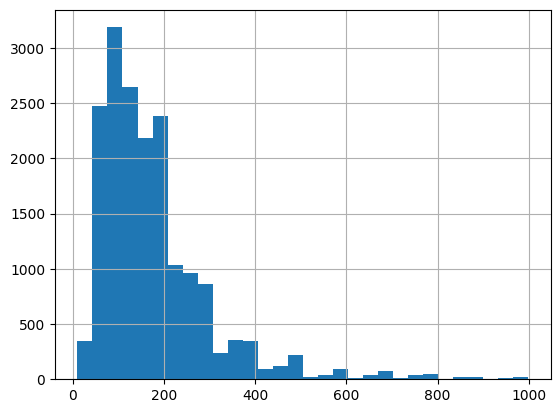

In [ ]:
Manhattan[Manhattan['price']<1000]['price'].hist(bins = 30)

<Axes: >

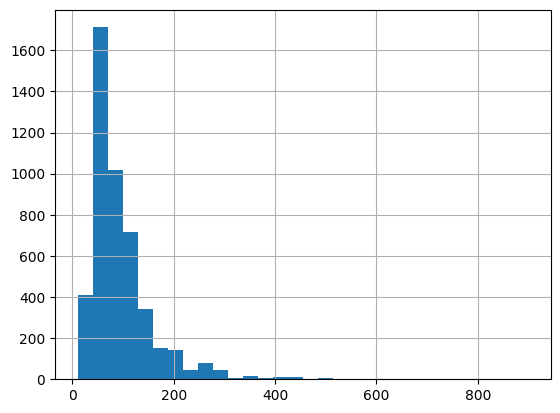

In [ ]:
Queens[Queens['price']<1000]['price'].hist(bins = 30)

In [ ]:
Bor = (Manhattan['price'], Queens['price'],Bronx['price'],Brooklyn['price'], St_Island['price'] )
Bor_names = ('Manhattan', 'Queens','Bronx','Brooklyn','St_Island' )
for i in range(1,5):
  p = scipy.stats.ttest_ind(Bor[0], Bor[i])[1]
  if p < 0.05:
    Res = "Yes"
  else:
    Res = "No"
  print([Bor_names[0],Bor_names[i],Res])



['Manhattan', 'Queens', 'Yes']
['Manhattan', 'Bronx', 'Yes']
['Manhattan', 'Brooklyn', 'Yes']
['Manhattan', 'St_Island', 'Yes']


### 4.1.2 What is the average price of a rental in each borough?

In [ ]:
def borough_avg(col_name,borough_name):
  counter = 0

  for airbnb in airbnb_data[col_name]:
    if airbnb == 1:
      counter += 1
  total_prices = airbnb_data[airbnb_data['neighbourhood_group'] == borough_name]['price'].sum()
  avg = total_prices/counter
  return avg

In [ ]:
dic = {}
dic['Brooklyn']= borough_avg('neighbourhood_group_Brooklyn','Brooklyn')
dic['Queens']= borough_avg('neighbourhood_group_Queens','Queens')
dic['Staten Island']= borough_avg('neighbourhood_group_Staten Island','Staten Island')
dic['Manhattan']= borough_avg('neighbourhood_group_Manhattan','Manhattan')
dic['Bronx']= borough_avg('neighbourhood_group_Bronx','Bronx')
dic


{'Brooklyn': 123.59156188546571,
 'Queens': 99.53645174884113,
 'Staten Island': 114.66975308641975,
 'Manhattan': 196.6660952275618,
 'Bronx': 88.86071817192601}

### 4.1.3 What is the effect of the number of reviews on price?

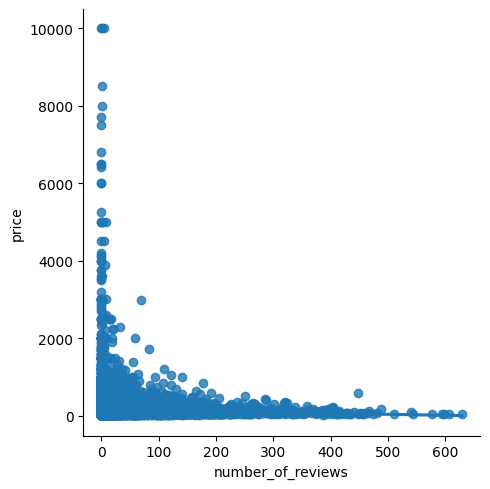

In [ ]:
airbnb_data
sns.lmplot(x = 'number_of_reviews',y = "price",data=airbnb_data)

In [ ]:
airbnb_data_RP = airbnb_data.drop(airbnb_data.columns.difference(['price', 'number_of_reviews']), axis=1, inplace=False)

In [ ]:
correlation_matrix=airbnb_data_RP.corr()

<Axes: >

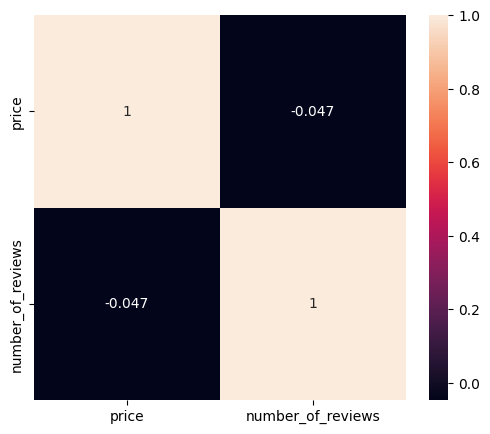

In [ ]:
plt.subplots(figsize=(6,5))
sns.heatmap(data=correlation_matrix, annot=True)

### 4.1.4 What is the average price range between a single room rental and an entire apt/home rental?


In [ ]:
private = airbnb_data[airbnb_data['room_type_Private room'] == 1]
entire = airbnb_data[airbnb_data['room_type_Entire home/apt'] == 1]
shared = airbnb_data[airbnb_data['room_type_Shared room'] == 1]

In [ ]:
private['price'].describe()

count    17742.000000
mean        89.179856
std        140.556855
min         10.000000
25%         50.000000
50%         70.000000
75%         96.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
shared['price'].describe()

count     917.000000
mean       71.870229
std       108.413336
min        10.000000
25%        33.000000
50%        45.000000
75%        75.000000
max      1800.000000
Name: price, dtype: float64

In [ ]:
entire['price'].describe()

count    22194.000000
mean       206.064026
std        274.263411
min         10.000000
25%        115.000000
50%        155.000000
75%        225.000000
max      10000.000000
Name: price, dtype: float64

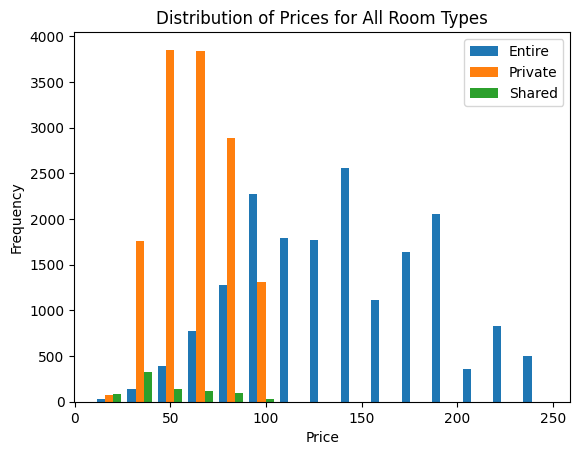

In [ ]:
x_multi = entire[entire['price']<250]['price'],private[private['price']<100]['price'],shared[shared['price']<100]['price']
plt.hist(x_multi, 15, histtype='bar')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices for All Room Types')
plt.legend(('Entire','Private','Shared'), loc='upper right')

### 4.2 Predictive Analytics Questions
### 4.2.1 Can we classify properties by room_type  based on availability, price, and location?

(Binary classification, private room and entire home/apt categories, combine categories)

In [ ]:
airbnb_data['room_type'].value_counts()

room_type
Entire home/apt    22194
Private room       17742
Shared room          917
Name: count, dtype: int64

In [ ]:
#airbnb_data['room_type'] = airbnb_data['room_type'].map({'Entire home/apt':1, 'Private room':0, 'Shared room':0})
airbnb_data.head()
features = airbnb_data[['availability_365','price','neighbourhood_group_Brooklyn','neighbourhood_group_Queens','neighbourhood_group_Staten Island','neighbourhood_group_Manhattan','neighbourhood_group_Bronx']]
target = airbnb_data[['room_type']]

In [ ]:
target.head()

,room_type
0,Private room
1,Entire home/apt
2,Private room
4,Entire home/apt
6,Private room


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
features.loc[:,'availability_365':'price'] = SS.fit_transform(features[['availability_365','price']])
features.head()

,availability_365,price,neighbourhood_group_Brooklyn,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_group_Manhattan,neighbourhood_group_Bronx
0,1.919827,-0.014272,1,0,0,0,0
1,1.843803,0.315380,0,0,0,1,0
2,1.919827,-0.009935,0,0,0,1,0
4,-0.855078,-0.313561,0,0,0,1,0
6,-0.855078,-0.400312,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.3, random_state = 17)
#balanced training data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
accuracy=[]
dic = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    KNN_Predictions_Test = knn.predict(X_test)
    Accuracy_Test = accuracy_score(y_test, KNN_Predictions_Test)
    accuracy.append(Accuracy_Test)
    dic[i] = Accuracy_Test
max(dic, key = dic.get)

28

0.793652088772846

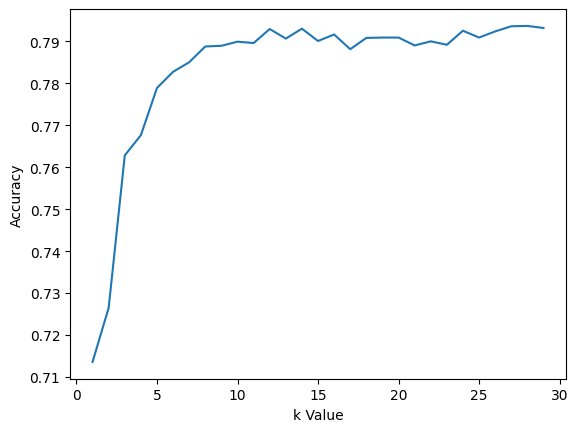

In [ ]:
plt.plot(range(1,30),accuracy)
plt.xlabel('k Value')
plt.ylabel('Accuracy')


max(accuracy)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)
knn_pred_train= knn.predict(X_train)
knn_pred_test= knn.predict(X_test)
print(classification_report(y_test, knn_pred_test))
print(confusion_matrix(y_test, knn_pred_test))

                 precision    recall  f1-score   support

Entire home/apt       0.81      0.84      0.83      6663
   Private room       0.76      0.76      0.76      5313
    Shared room       0.81      0.14      0.24       280

       accuracy                           0.79     12256
      macro avg       0.80      0.58      0.61     12256
   weighted avg       0.79      0.79      0.78     12256

[[5609 1051    3]
 [1272 4035    6]
 [  31  210   39]]


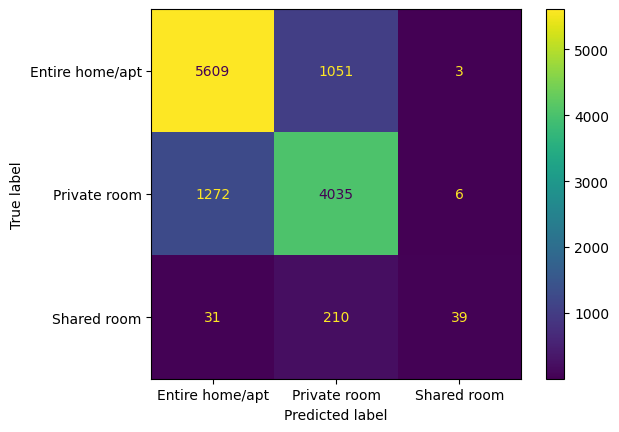

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn_pred_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot()

### 4.2.2 What is the impact of availability of a home/apartment on the cost?

(Scarce resources with big demand will cause pricing to increase)     (regression model to predict price, doesn’t have to just be availability, could set up matrix to compare different attributes, could come up with an equation with multiple variables containing different attributes, can create different questions from this new model we create)

In [ ]:
airbnb_data.drop(columns = ['neighbourhood_group_Staten Island','room_type_Entire home/apt'],inplace = True)
airbnb_data2 = airbnb_data.select_dtypes(include=np.number)

In [ ]:
correlation_matrix=airbnb_data2.corr()

<Axes: >

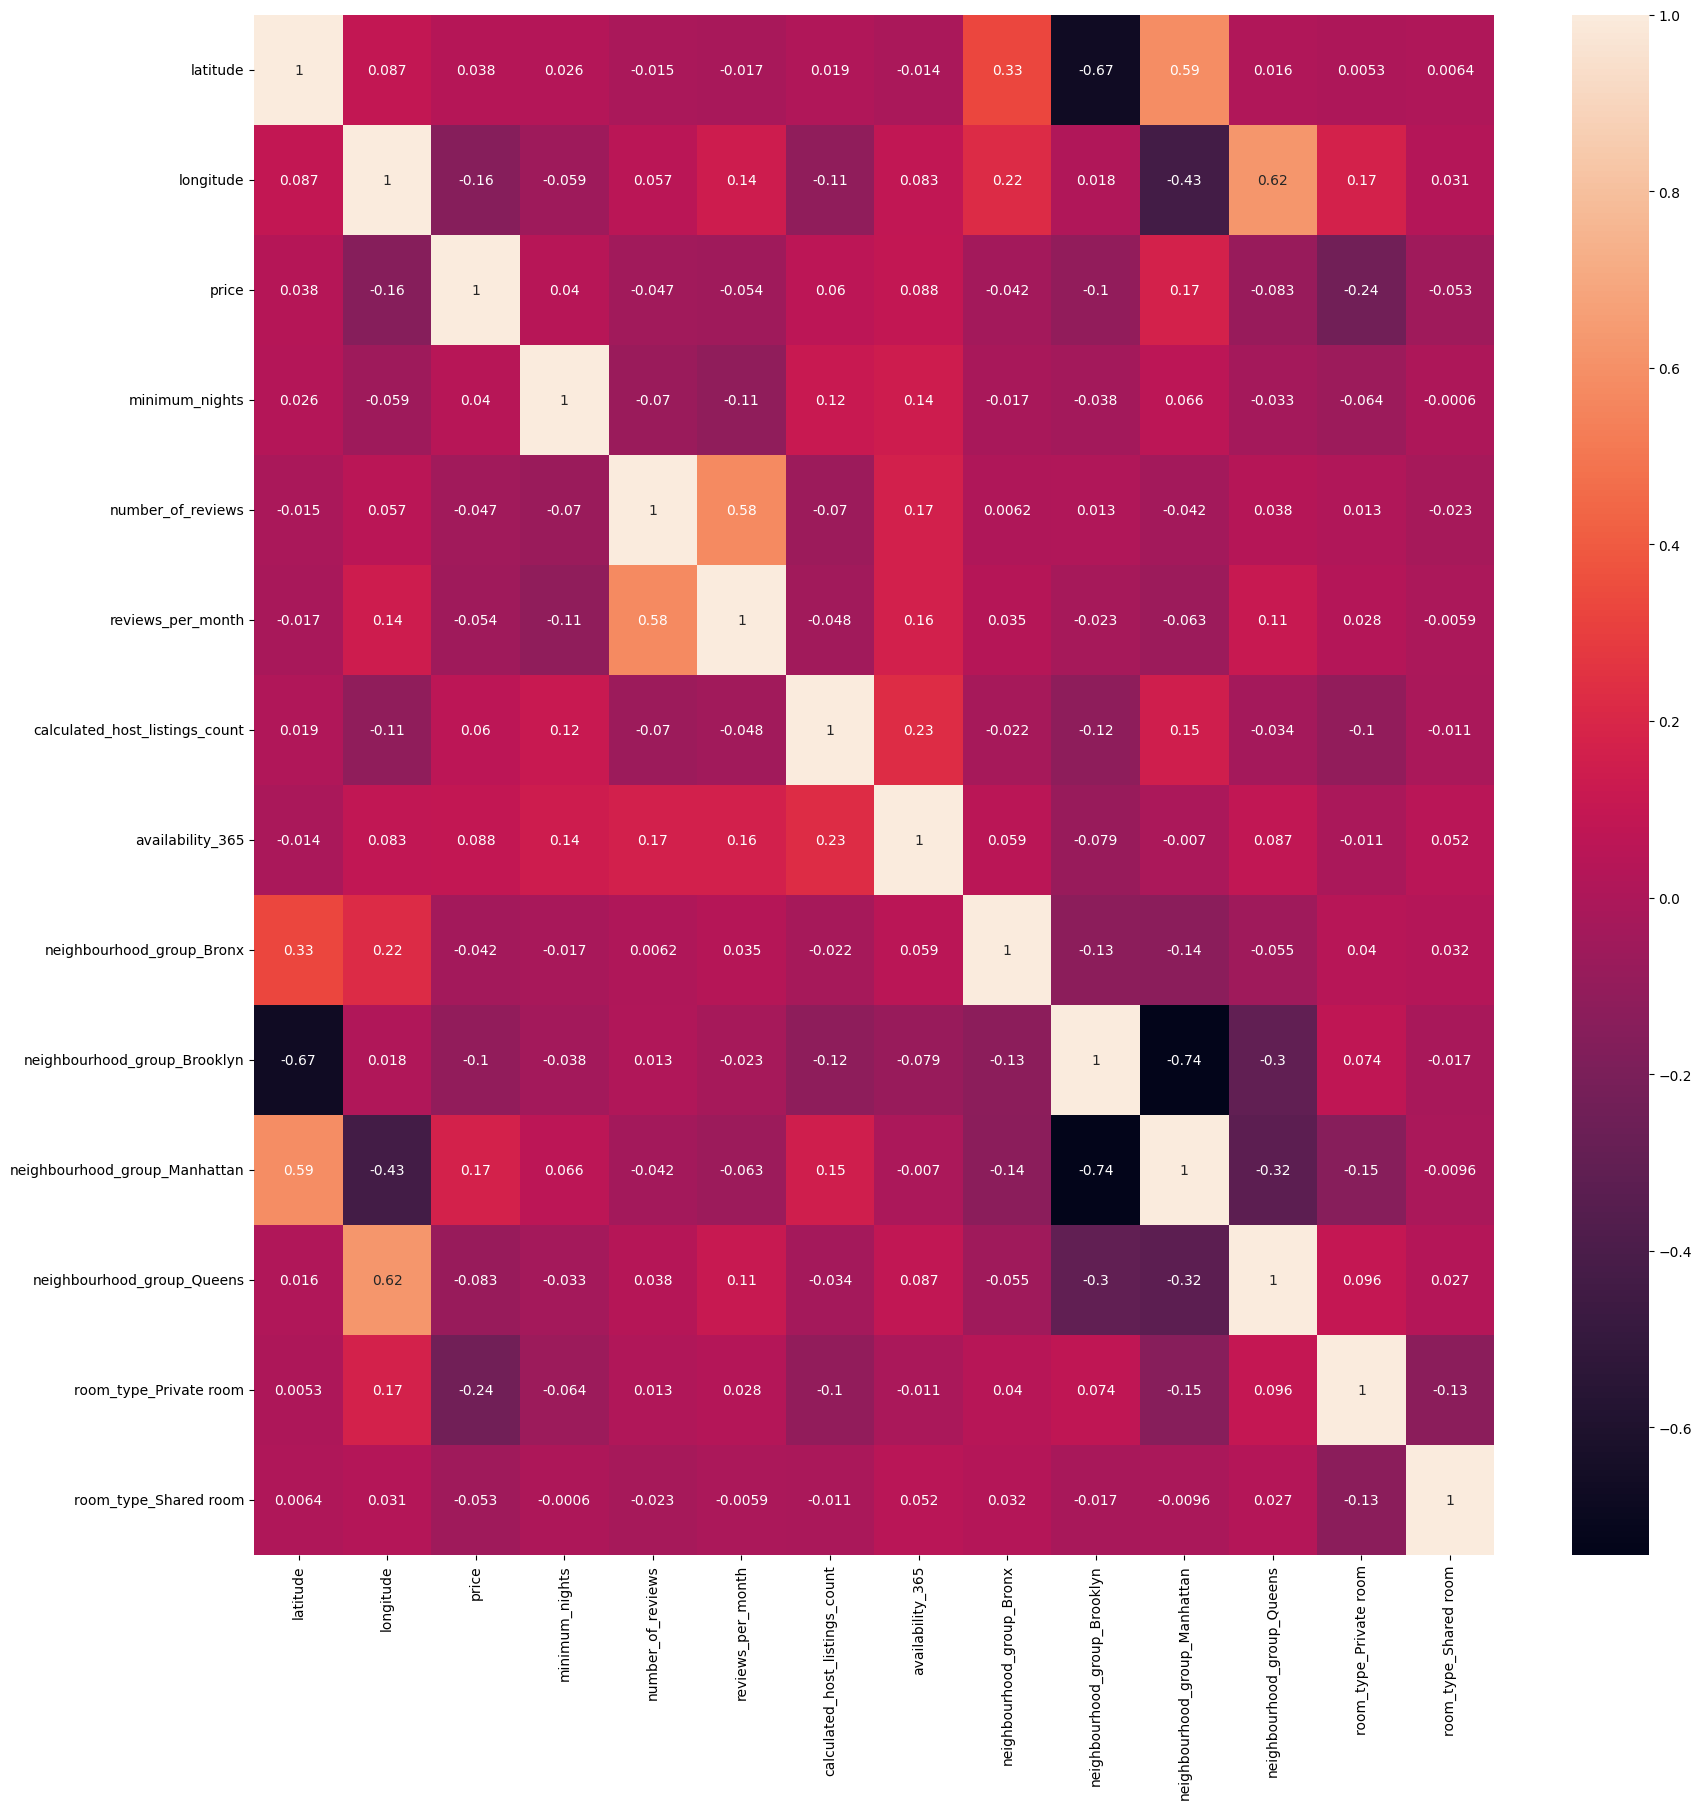

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40853 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             40853 non-null  object 
 1   latitude                        40853 non-null  float64
 2   longitude                       40853 non-null  float64
 3   room_type                       40853 non-null  object 
 4   price                           40853 non-null  int64  
 5   minimum_nights                  40853 non-null  float64
 6   number_of_reviews               40853 non-null  float64
 7   reviews_per_month               40853 non-null  float64
 8   calculated_host_listings_count  40853 non-null  int64  
 9   availability_365                40853 non-null  int64  
 10  neighbourhood_group_Bronx       40853 non-null  int64  
 11  neighbourhood_group_Brooklyn    40853 non-null  int64  
 12  neighbourhood_group_Manhattan   40853

In [ ]:
y=airbnb_data['price']

In [ ]:
x=airbnb_data[['availability_365' , 'calculated_host_listings_count' , 'reviews_per_month']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [ ]:
print(x_train, y_train)

       availability_365  calculated_host_listings_count  reviews_per_month
35307                 0                               1               0.11
32776               330                               3               0.62
43983               145                               1               0.00
5098                295                               1               3.89
36323                 6                               7               1.00
...                 ...                             ...                ...
14779                 0                               5               3.54
6859                274                              34               0.21
9610                  0                               1               0.35
21183                 0                               1               0.05
21405                19                               1               2.33

[28597 rows x 3 columns] 35307    150
32776     50
43983    110
5098     216
36323     29
        .

In [ ]:
print(x_test, y_test)

       availability_365  calculated_host_listings_count  reviews_per_month
43755                 0                               2               0.37
40472               364                               3               0.00
16566                 0                               1               0.06
11642               333                              49               0.00
5059                253                               1               0.97
...                 ...                             ...                ...
14807                90                               2               2.70
48173                27                               1               1.00
33051                 0                               1               1.14
38598               158                               3               0.00
472                 222                               1               0.35

[12256 rows x 3 columns] 43755    105
40472    125
16566     60
11642    175
5059      80
        .

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Regression Intercept:', LR.intercept_)
print('Regression Coefficients:',LR.coef_)

Regression Intercept: 143.76999456787996
Regression Coefficients: [ 0.151075    0.24355105 -9.00996296]


In [ ]:
LR_Predictions_Train= LR.predict(x_train)

In [ ]:
LR_Predictions_Test= LR.predict(x_test)

In [ ]:
LR_Predictions= LR.predict(x)

In [ ]:
print(LR_Predictions)

[198.48158458 194.46493666 199.15592157 ... 148.09257069 145.53345085
 147.48827067]


In [ ]:
print('R^2 for training set:', LR.score(x_train, y_train))
print('R^2 for test set:', LR.score(x_test, y_test))

R^2 for training set: 0.01279569694917393
R^2 for test set: 0.015606768057621179


In [ ]:
print('Adjusted R^2 for training set:',1 - (1-LR.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-len(x_train.columns)-1))
print('Adjusted R^2 for test set:',1 - (1-LR.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-len(x_test.columns)-1))

Adjusted R^2 for training set: 0.012692118698932497
Adjusted R^2 for test set: 0.015365731516988834


In [ ]:
from sklearn import metrics

In [ ]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, LR_Predictions_Train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, LR_Predictions_Test))
print('RMSE for training set:', RMSE_train)
print('RMSE for test set:', RMSE_test)

RMSE for training set: 227.87371709103044
RMSE for test set: 231.49268526594258


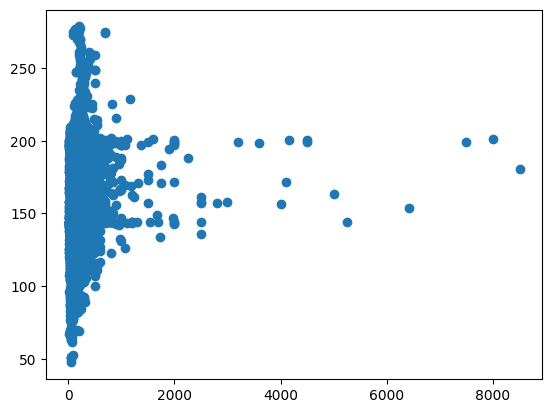

In [ ]:
plt.scatter(y_test,LR_Predictions_Test)

<ipython-input-193-faecd5fef7bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-LR_Predictions_Test),bins=50);


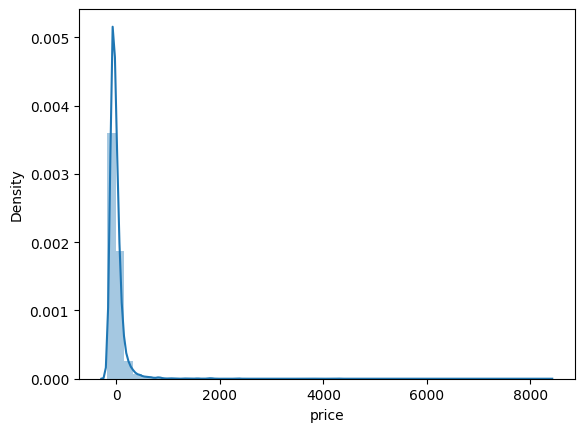

In [ ]:
sns.distplot((y_test-LR_Predictions_Test),bins=50);

There are no strong correlations with price from the correlation heat map. The strongest correlations seem to be between availability 365 and a number of other categories. Though the correlation still is not very strong.
The strongest correlation by far is between number of reviews and reviews per month but it does not helpful to evaluate these two categories, they are self explanitory.
  So, some new questions formed from this model:
    What categories affect availability? How significant are their correlations?

In [ ]:
y=airbnb_data['availability_365']

In [ ]:
x=airbnb_data[['calculated_host_listings_count' , 'number_of_reviews' , 'minimum_nights' , 'reviews_per_month']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=101)

In [ ]:
print(x_train, y_train)

       calculated_host_listings_count  number_of_reviews  minimum_nights  \
35307                               1                1.0            20.0   
32776                               3                6.0             4.0   
43983                               1                0.0            30.0   
5098                                1              233.0             1.0   
36323                               7                1.0            29.0   
...                               ...                ...             ...   
14779                               5              142.0             2.0   
6859                               34               11.0            30.0   
9610                                1               14.0             3.0   
21183                               1                1.0             7.0   
21405                               1               68.0             1.0   

       reviews_per_month  
35307               0.11  
32776               0.62  
43983 

In [ ]:
print(x_test, y_test)

       calculated_host_listings_count  number_of_reviews  minimum_nights  \
43755                               2                1.0             1.0   
40472                               3                0.0             3.0   
16566                               1                2.0             3.0   
11642                              49                0.0            30.0   
5059                                1               57.0             1.0   
...                               ...                ...             ...   
14807                               2              102.0             1.0   
48173                               1                1.0             1.0   
33051                               1               14.0             1.0   
38598                               3                0.0             1.0   
472                                 1               34.0             2.0   

       reviews_per_month  
43755               0.37  
40472               0.00  
16566 

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
print('Regression Intercept:', LR.intercept_)
print('Regression Coefficients:',LR.coef_)

Regression Intercept: 80.0154729830492
Regression Coefficients: [ 0.85120478  0.36285546  1.07949736 10.30271434]


In [ ]:
LR_Predictions_Train= LR.predict(x_train)

In [ ]:
LR_Predictions_Test= LR.predict(x_test)

In [ ]:
LR_Predictions= LR.predict(x)

In [ ]:
print(LR_Predictions)

[ 91.63146819 103.0409072   84.10516983 ...  91.66165133  86.20219901
  88.42315926]


In [ ]:
print('R^2 for training set:', LR.score(x_train, y_train))
print('R^2 for test set:', LR.score(x_test, y_test))

R^2 for training set: 0.1155351794701206
R^2 for test set: 0.08871708235565134


In [ ]:
print('Adjusted R^2 for training set:',1 - (1-LR.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-len(x_train.columns)-1))
print('Adjusted R^2 for test set:',1 - (1-LR.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-len(x_test.columns)-1))

Adjusted R^2 for training set: 0.11541144348515553
Adjusted R^2 for test set: 0.08841954487539849


In [ ]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, LR_Predictions_Train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, LR_Predictions_Test))
print('RMSE for training set:', RMSE_train)
print('RMSE for test set:', RMSE_test)

RMSE for training set: 123.98199203264423
RMSE for test set: 124.90353014972403


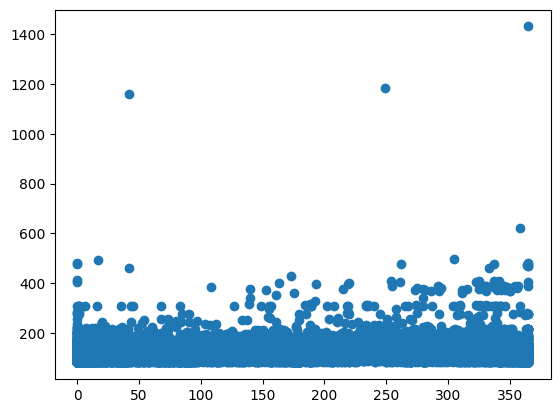

In [ ]:
plt.scatter(y_test,LR_Predictions_Test)

<ipython-input-210-faecd5fef7bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-LR_Predictions_Test),bins=50);


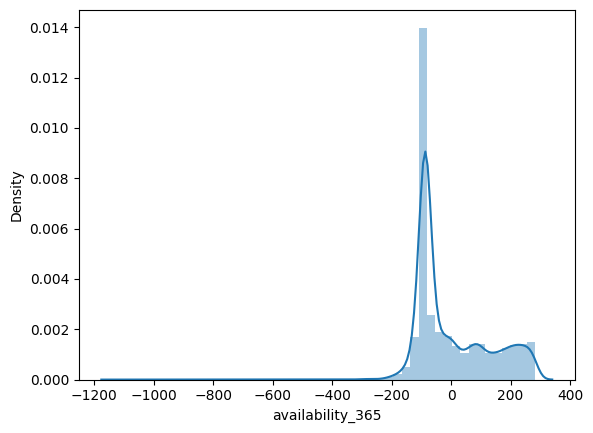

In [ ]:
sns.distplot((y_test-LR_Predictions_Test),bins=50);

When looking at availability there are stronger correlations and linear relationships than price, but still not great.